In [18]:
import pandas as pd
df_funding_rounds = pd.read_csv('datasets\\funding_rounds.csv')
print(df_funding_rounds.head(5))

   id  funding_round_id object_id   funded_at funding_round_type  \
0   1                 1       c:4  2006-12-01           series-b   
1   2                 2       c:5  2004-09-01              angel   
2   3                 3       c:5  2005-05-01           series-a   
3   4                 4       c:5  2006-04-01           series-b   
4   5                 5    c:7299  2006-05-01           series-b   

  funding_round_code  raised_amount_usd  raised_amount raised_currency_code  \
0                  b          8500000.0      8500000.0                  USD   
1              angel           500000.0       500000.0                  USD   
2                  a         12700000.0     12700000.0                  USD   
3                  b         27500000.0     27500000.0                  USD   
4                  b         10500000.0     10500000.0                  USD   

   pre_money_valuation_usd  ...  post_money_valuation  \
0                      0.0  ...                   0.0   
1 

In [5]:
print(df_funding_rounds.columns)

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')


In [6]:
#objectid
print(df_funding_rounds['object_id'].head(5))

0       c:4
1       c:5
2       c:5
3       c:5
4    c:7299
Name: object_id, dtype: object


In [8]:
highest_post_money = df_funding_rounds['post_money_valuation_usd'].max()
print(highest_post_money)

24324234322.0
0.0


In [11]:
df_funds = pd.read_csv('datasets\\funds.csv')

#get all of the fund names
print(df_funds['name'])
print(df_funds.head(5))

0                      Second Fund
1       Sequoia Israel Fourth Fund
2                       Tenth fund
3                New funds acquire
4                       Third fund
                   ...            
1559                        Fund V
1560     JANVEST Technologies LP I
1561                       Fund II
1562                        Fund I
1563          Rochester Angel Fund
Name: name, Length: 1564, dtype: object
   id  fund_id object_id                        name   funded_at  \
0   1        1     f:371                 Second Fund  2008-12-16   
1   4        4      f:17  Sequoia Israel Fourth Fund  2008-12-17   
2   5        5     f:951                  Tenth fund  2008-08-11   
3   6        6     f:192           New funds acquire         NaN   
4   7        7     f:519                  Third fund  2008-05-20   

   raised_amount raised_currency_code  \
0    300000000.0                  USD   
1    200750000.0                  USD   
2    650000000.0                  USD   
3 

In [13]:
funding_round_counts = df['funding_round_type'].value_counts()
print(funding_round_counts)

funding_round_type
venture           15342
angel             13163
series-a           9873
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: count, dtype: int64


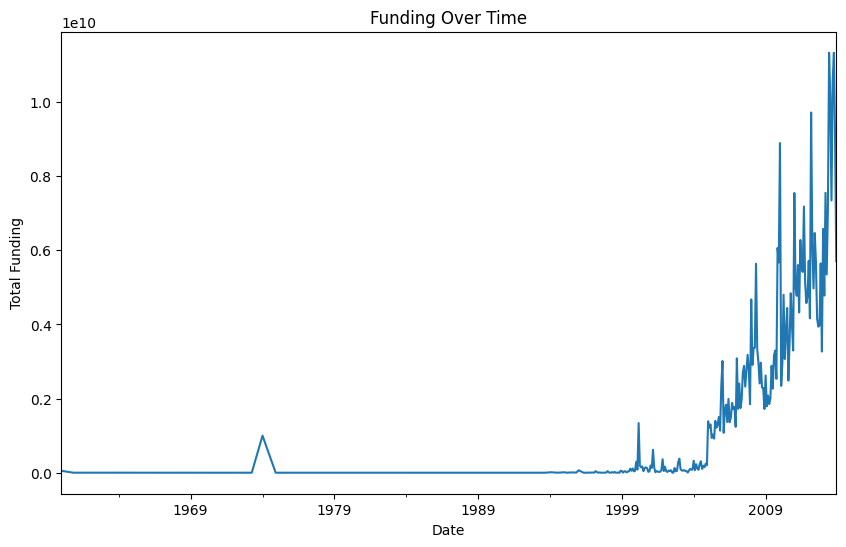

In [16]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['funded_at'])
# Group by date and calculate total funding
df_grouped = df.groupby(df['date'].dt.to_period('M'))['raised_amount'].sum()

# Plot the trend
plt.figure(figsize=(10,6))
df_grouped.plot()
plt.title('Funding Over Time')
plt.xlabel('Date')
plt.ylabel('Total Funding')
plt.show()

In [17]:
#print the first 5 rows of the funding_rounds dataframe
print(df_funding_rounds.head(5))

   id  funding_round_id object_id   funded_at funding_round_type  \
0   1                 1       c:4  2006-12-01           series-b   
1   2                 2       c:5  2004-09-01              angel   
2   3                 3       c:5  2005-05-01           series-a   
3   4                 4       c:5  2006-04-01           series-b   
4   5                 5    c:7299  2006-05-01           series-b   

  funding_round_code  raised_amount_usd  raised_amount raised_currency_code  \
0                  b          8500000.0      8500000.0                  USD   
1              angel           500000.0       500000.0                  USD   
2                  a         12700000.0     12700000.0                  USD   
3                  b         27500000.0     27500000.0                  USD   
4                  b         10500000.0     10500000.0                  USD   

   pre_money_valuation_usd  ...  post_money_valuation  \
0                      0.0  ...                   0.0   
1 

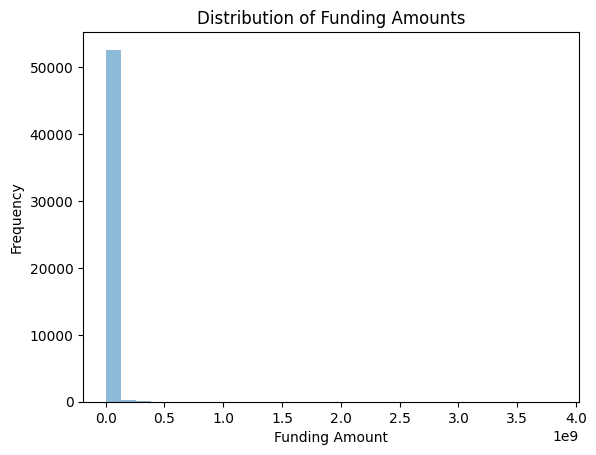

In [19]:
#histogram
plt.hist(df_funding_rounds['raised_amount'], bins=30, alpha=0.5)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()

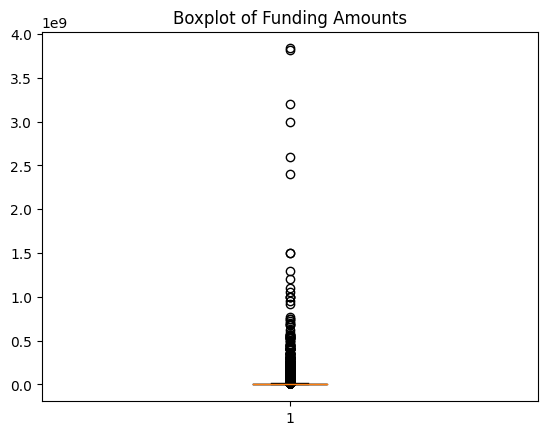

In [20]:
plt.boxplot(df_funding_rounds['raised_amount'])
plt.title('Boxplot of Funding Amounts')
plt.show()

In [26]:
df_funding_rounds['funded_at'].describe()

count          52680
unique          3399
top       2012-01-01
freq             462
Name: funded_at, dtype: object

In [31]:
df_funding_rounds['raised_amount'].head()

0     8500000.0
1      500000.0
2    12700000.0
3    27500000.0
4    10500000.0
Name: raised_amount, dtype: float64

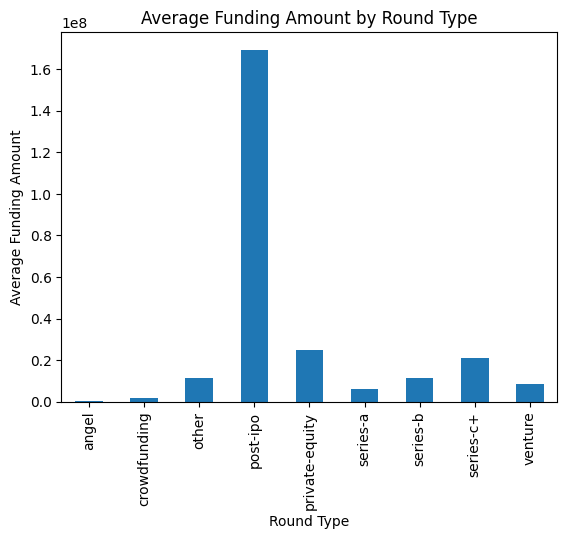

In [33]:
#bar plot to compare funding across different round types
average_funding_by_round = df_funding_rounds.groupby('funding_round_type')['raised_amount'].mean()
average_funding_by_round.plot(kind='bar')
plt.title('Average Funding Amount by Round Type')
plt.xlabel('Round Type')
plt.ylabel('Average Funding Amount')
plt.show()

In [52]:
#get all of the post-ipo funding rounds
post_ipo = df_funding_rounds[df_funding_rounds['funding_round_type'] == 'post-ipo']
post_ipo.head(5)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
3220,3548,3548,c:351,2005-12-01,post-ipo,post_ipo_equity,1.000000e+09,1.000000e+09,USD,0.0,...,0.0,NaN,1,1,1,http://www.google.com/press/pressrel/twaol_exp...,Time Warner's AOL and Google to Expand Strateg...,gene,2008-09-30 18:19:22,2012-02-24 22:06:58
6186,6828,6828,c:4825,2009-06-22,post-ipo,post_ipo_debt,5.257500e+08,5.257500e+08,USD,0.0,...,0.0,NaN,0,1,0,http://www.reuters.com/article/rbssTechMediaTe...,New Issue-XM Satellite Radio sells $525.75 mln...,djdiaz,2009-06-22 19:29:44,2012-02-24 19:11:25
6489,7145,7145,c:4825,2009-02-01,post-ipo,post_ipo_debt,5.300000e+08,5.300000e+08,USD,0.0,...,0.0,NaN,1,0,1,http://www.washingtonpost.com/wp-dyn/content/a...,Liberty Extends $530 Million Loan to Bail Out ...,daniel,2009-07-06 17:29:08,2012-02-24 19:41:31
8328,9099,9099,c:33777,2009-09-30,post-ipo,post_ipo_equity,3.500000e+07,3.500000e+07,USD,0.0,...,0.0,NaN,0,0,1,http://investors.vrtx.com/releasedetail.cfm?Re...,Vertex Pharmaceuticals to Receive $155 Million...,timircha,2009-10-12 06:56:30,2012-02-24 22:21:03
8681,9471,9471,c:13219,2009-11-24,post-ipo,post_ipo_debt,9.200000e+08,9.200000e+08,USD,0.0,...,0.0,NaN,5,0,0,http://deals.venturebeat.com/2009/11/24/clearw...,Clearwire takes on $920M more to build out wir...,arun,2009-11-11 03:02:53,2012-02-24 19:10:06


In [54]:
#get all of the angel investments
angel = df_funding_rounds[df_funding_rounds['funding_round_type'] == 'angel']
angel.head(5)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
9,10,10,c:15,2006-06-01,angel,seed,12000.0,12000.0,USD,0.0,...,0.0,NaN,1,0,1,http://www.techcrunch.com/2007/03/06/scribd-yo...,"Scribd ""YouTube for Documents"" Gets $300K",initial-importer,2007-06-02 07:36:21,2012-08-13 23:30:48
10,11,11,c:15,2007-01-01,angel,angel,40000.0,40000.0,USD,0.0,...,0.0,NaN,1,0,0,NaN,NaN,initial-importer,2007-06-02 07:38:17,2011-04-12 00:57:58
31,35,35,c:43,2007-06-01,angel,seed,1000000.0,1000000.0,USD,0.0,...,0.0,NaN,2,1,1,http://www.techcrunch.com/,NaN,initial-importer,2007-06-16 05:19:47,2008-02-25 00:23:58
39,43,43,c:54,2007-02-01,angel,seed,700000.0,700000.0,USD,0.0,...,0.0,NaN,1,0,1,http://www.techcrunch.com/tag/wesabe,NaN,initial-importer,2007-06-20 11:04:09,2008-02-25 00:23:58
